# Experiments for the 2D Eiknonal equation in a square

This corresponds to the first numerical experiment in the paper

In [1]:
import torch.optim as optim
import matplotlib.pyplot as plt
import torch
from time import time as t

import sys
# setting path
sys.path.append('../')

from visualization.plots_cube import plot_2d_proj
from Hamiltonians.Eikonal_LxF import Eikonal_sq_LF_multiD


dim = 2

side_length = 6.

from PointSampling.Cube import data_gen_cube
domain = data_gen_cube(side_length, dim)

#Right-hand-side of the PDE
def f(X):    
    return 1

#Boundary condition
def g(X):    
    return 0

In [2]:
from Training.training import train
from error_test.cube_error import error_cube


training_params = {
    'numerical_scheme': Eikonal_sq_LF_multiD,

    'f': f,
    'g': g,
    'c': None,
    
    'beta': 0.,  ## parameter for the +u term
    'lambda': 1. #weight parameter for the boundary loss
    }

delta_list = [.75, .5, .3, .1, .05]
alpha_list = [2.5, 2., 1.5, 1., .5]
rounds = len(delta_list)

N_col_list = [60]*rounds
N_b_list = [20]*rounds
num_iterations_list = [1000]*rounds

C:\Users\usuario\anaconda3\envs\FD_PINNs\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


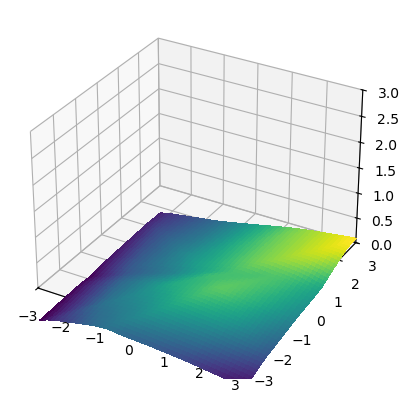

100%|██████████| 1000/1000 [00:01<00:00, 563.58it/s]


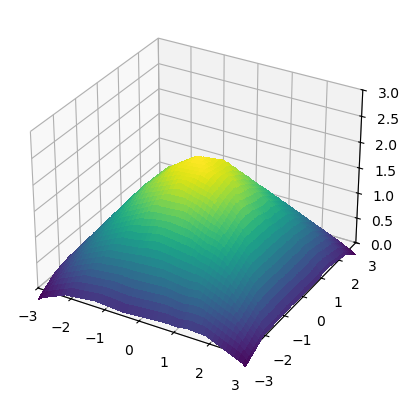

100%|██████████| 1000/1000 [00:01<00:00, 571.72it/s]


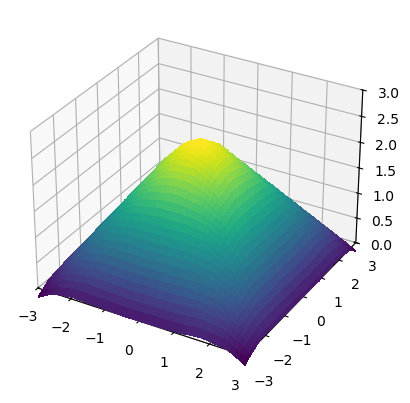

100%|██████████| 1000/1000 [00:01<00:00, 627.72it/s]


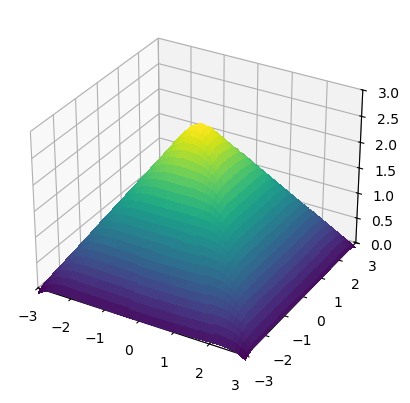

100%|██████████| 1000/1000 [00:01<00:00, 609.89it/s]


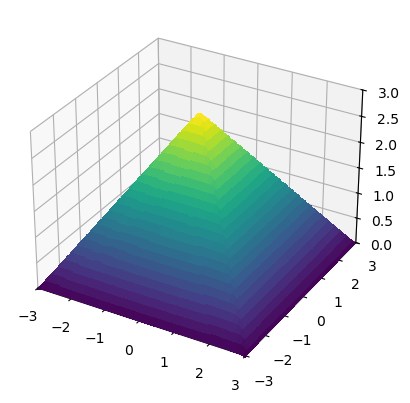

100%|██████████| 1000/1000 [00:01<00:00, 622.66it/s]


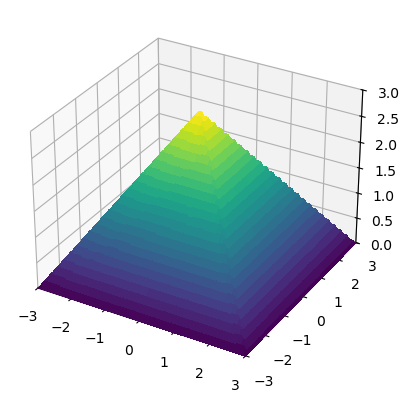

Mean square error: tensor(1.7441e-05)
L-infinity error: tensor(0.0098)
Run time: tensor(8.3697)


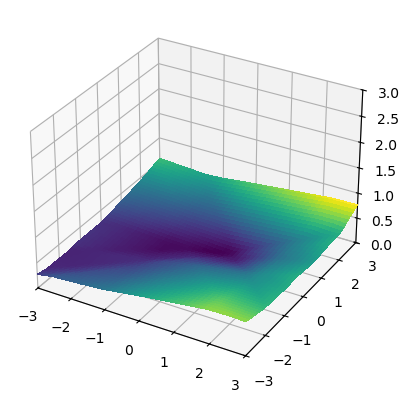

100%|██████████| 1000/1000 [00:01<00:00, 611.47it/s]


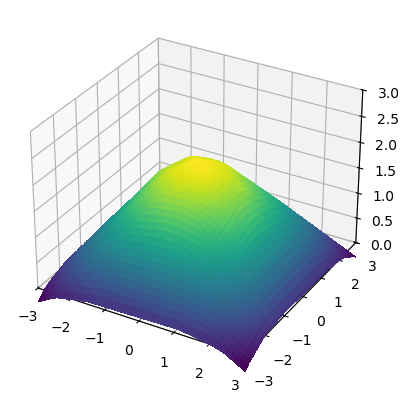

100%|██████████| 1000/1000 [00:01<00:00, 625.24it/s]


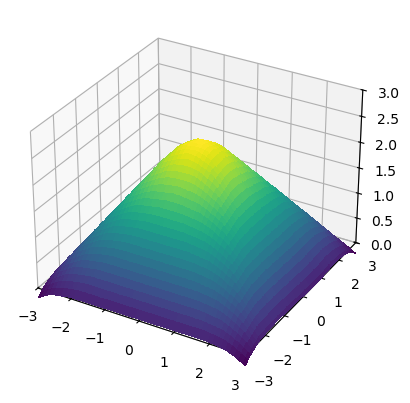

100%|██████████| 1000/1000 [00:01<00:00, 600.94it/s]


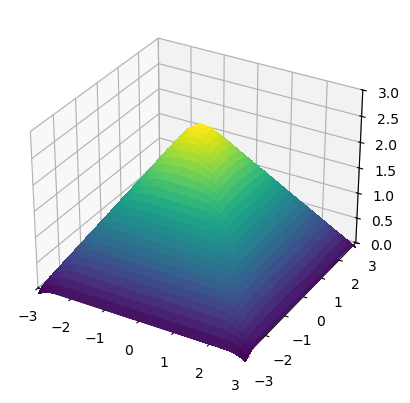

100%|██████████| 1000/1000 [00:01<00:00, 586.35it/s]


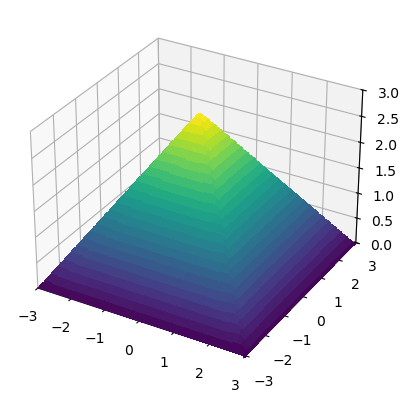

100%|██████████| 1000/1000 [00:01<00:00, 577.87it/s]


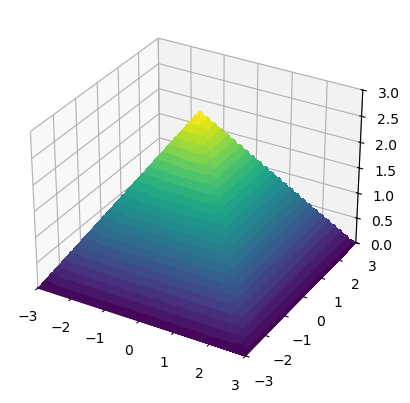

Mean square error: tensor(1.9399e-05)
L-infinity error: tensor(0.0121)
Run time: tensor(16.7062)


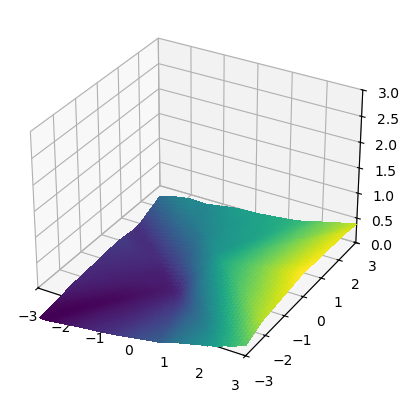

100%|██████████| 1000/1000 [00:01<00:00, 624.02it/s]


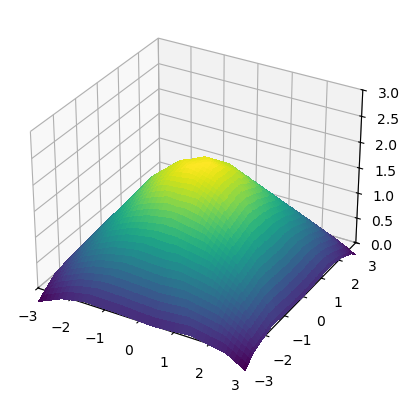

100%|██████████| 1000/1000 [00:01<00:00, 612.89it/s]


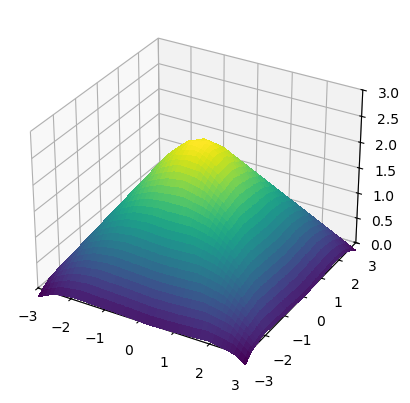

100%|██████████| 1000/1000 [00:01<00:00, 616.10it/s]


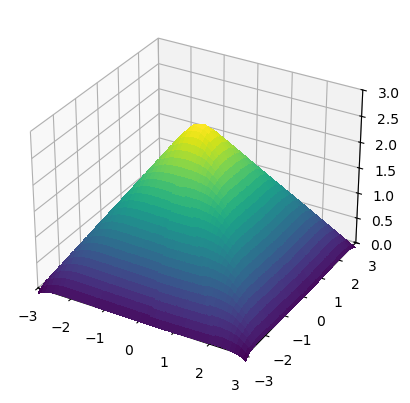

100%|██████████| 1000/1000 [00:01<00:00, 618.33it/s]


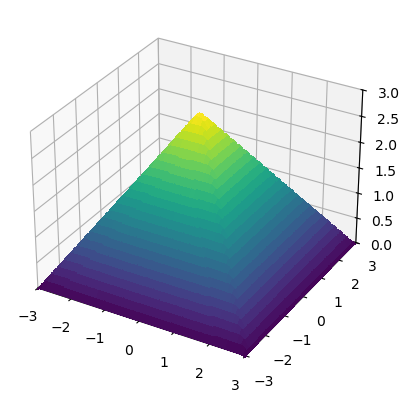

100%|██████████| 1000/1000 [00:01<00:00, 603.17it/s]


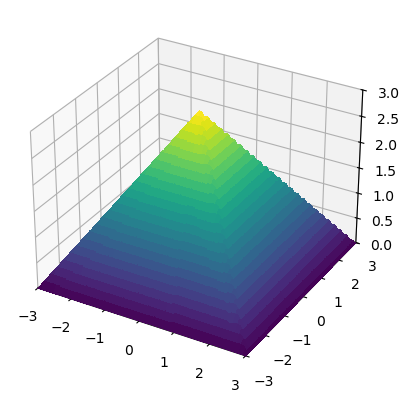

Mean square error: tensor(1.0496e-05)
L-infinity error: tensor(0.0091)
Run time: tensor(24.8542)


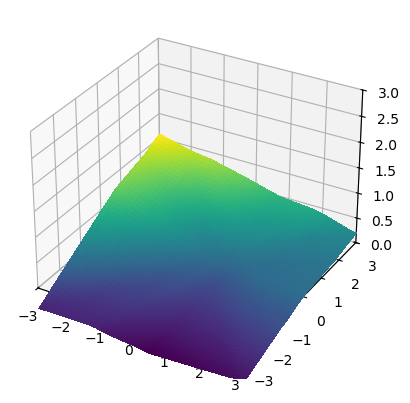

100%|██████████| 1000/1000 [00:01<00:00, 601.95it/s]


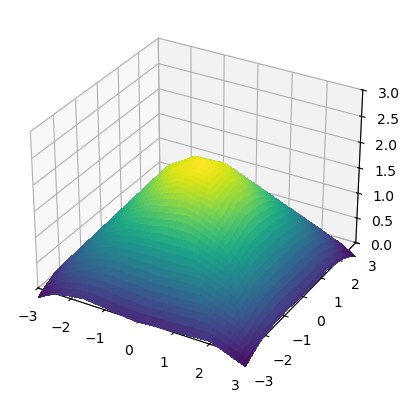

100%|██████████| 1000/1000 [00:01<00:00, 555.07it/s]


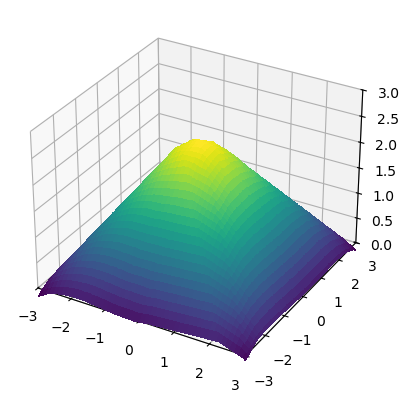

100%|██████████| 1000/1000 [00:01<00:00, 549.17it/s]


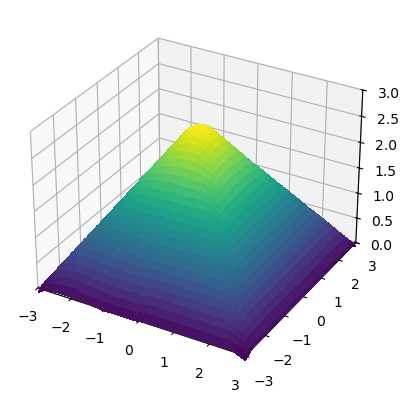

100%|██████████| 1000/1000 [00:01<00:00, 561.92it/s]


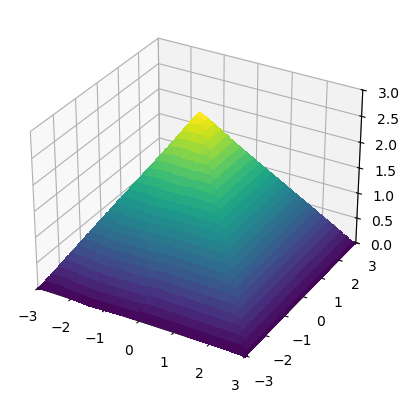

100%|██████████| 1000/1000 [00:01<00:00, 555.81it/s]


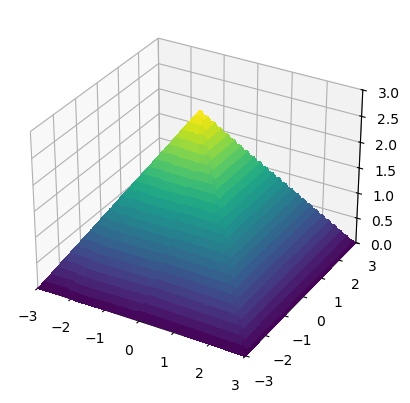

Mean square error: tensor(4.2324e-05)
L-infinity error: tensor(0.0211)
Run time: tensor(33.7474)


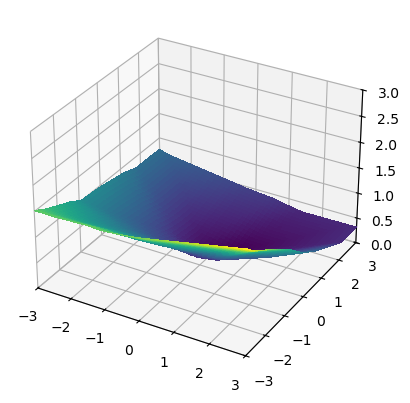

100%|██████████| 1000/1000 [00:01<00:00, 560.48it/s]


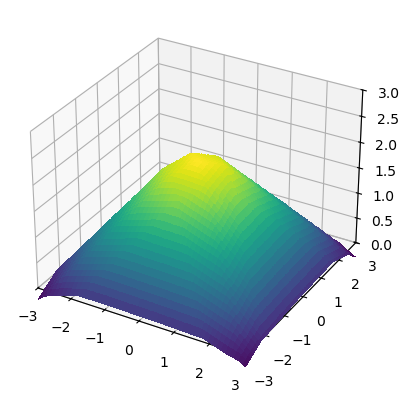

100%|██████████| 1000/1000 [00:01<00:00, 504.25it/s]


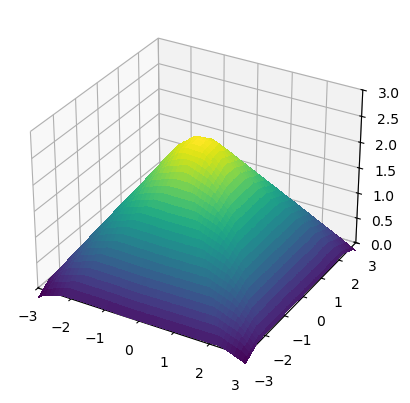

100%|██████████| 1000/1000 [00:01<00:00, 535.55it/s]


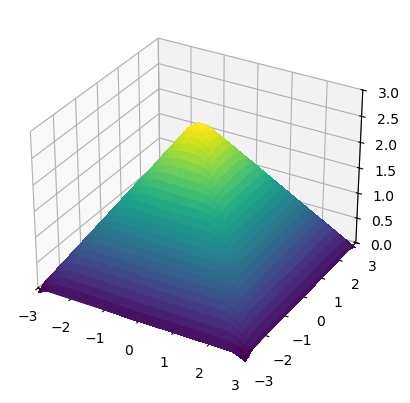

100%|██████████| 1000/1000 [00:01<00:00, 524.82it/s]


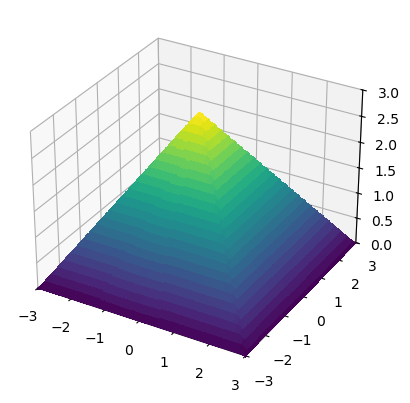

100%|██████████| 1000/1000 [00:01<00:00, 559.58it/s]


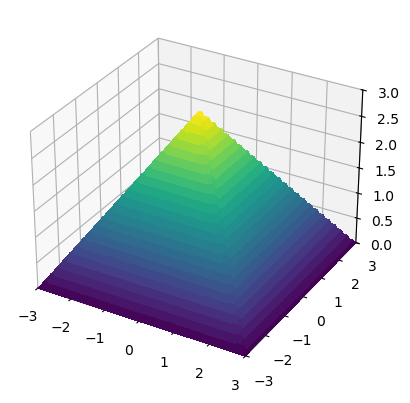

Mean square error: tensor(1.0588e-05)
L-infinity error: tensor(0.0099)
Run time: tensor(43.0933)


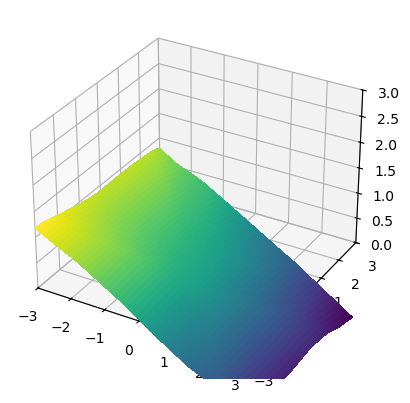

100%|██████████| 1000/1000 [00:01<00:00, 580.61it/s]


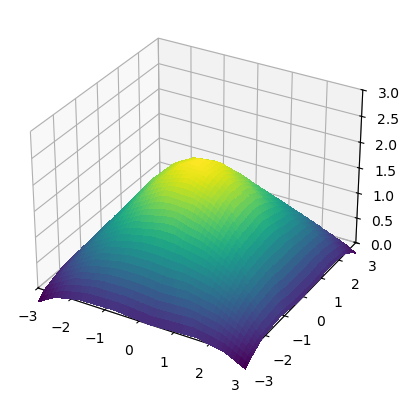

100%|██████████| 1000/1000 [00:01<00:00, 568.41it/s]


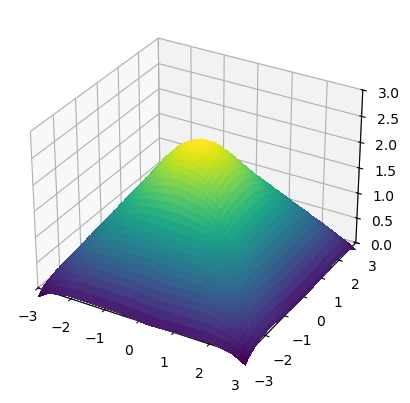

100%|██████████| 1000/1000 [00:01<00:00, 571.63it/s]


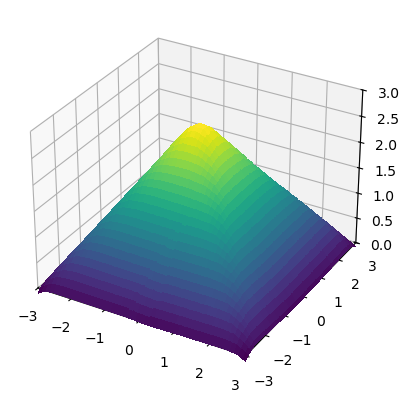

100%|██████████| 1000/1000 [00:01<00:00, 580.87it/s]


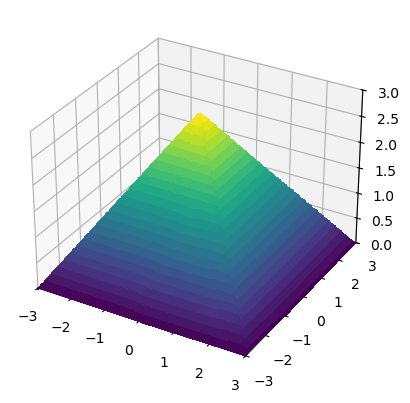

100%|██████████| 1000/1000 [00:01<00:00, 547.04it/s]


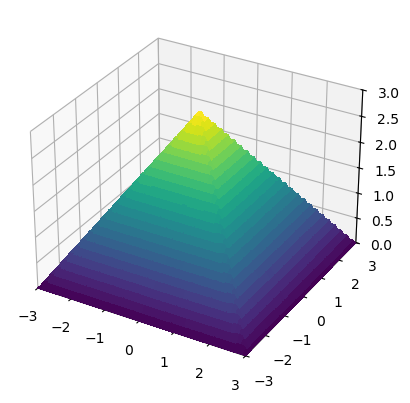

Mean square error: tensor(1.1952e-05)
L-infinity error: tensor(0.0105)
Run time: tensor(51.8860)


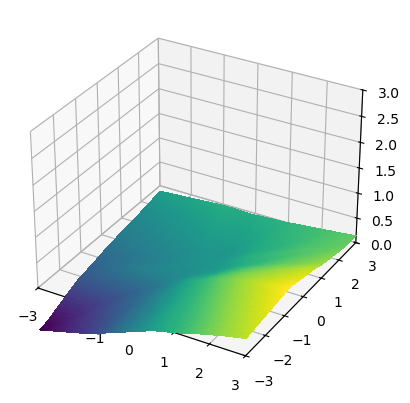

100%|██████████| 1000/1000 [00:01<00:00, 502.40it/s]


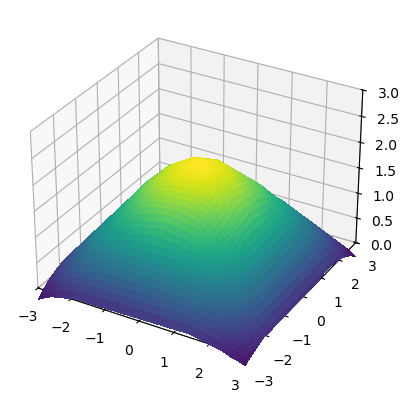

100%|██████████| 1000/1000 [00:01<00:00, 524.49it/s]


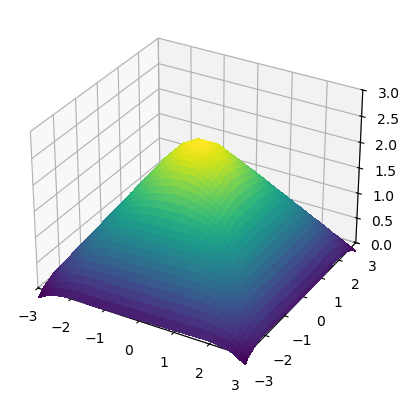

100%|██████████| 1000/1000 [00:01<00:00, 562.25it/s]


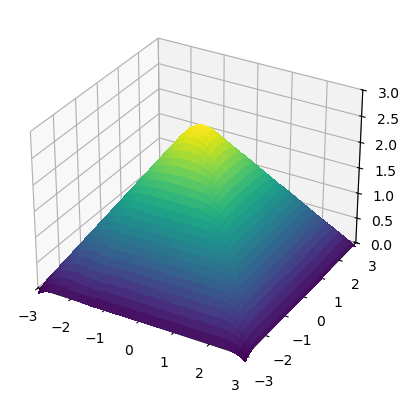

100%|██████████| 1000/1000 [00:01<00:00, 559.02it/s]


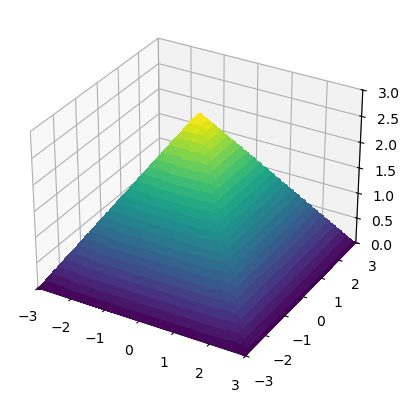

100%|██████████| 1000/1000 [00:01<00:00, 551.70it/s]


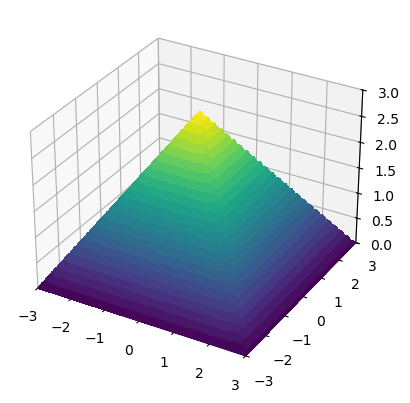

Mean square error: tensor(3.1293e-05)
L-infinity error: tensor(0.0214)
Run time: tensor(61.1852)


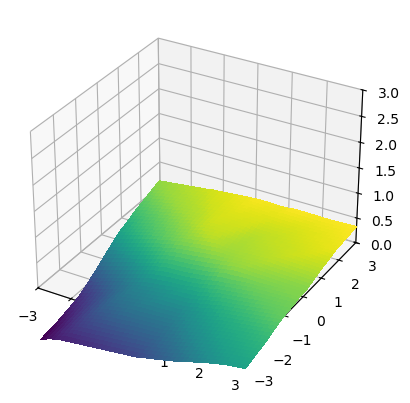

100%|██████████| 1000/1000 [00:01<00:00, 507.35it/s]


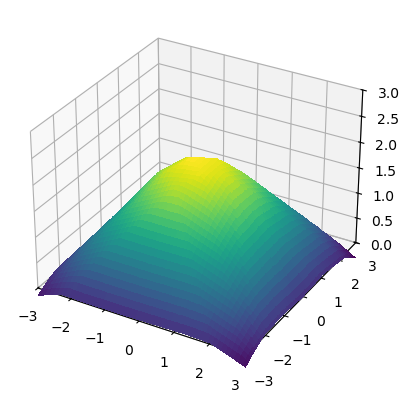

100%|██████████| 1000/1000 [00:01<00:00, 529.47it/s]


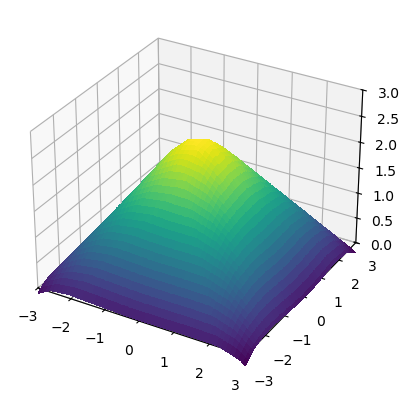

100%|██████████| 1000/1000 [00:01<00:00, 565.05it/s]


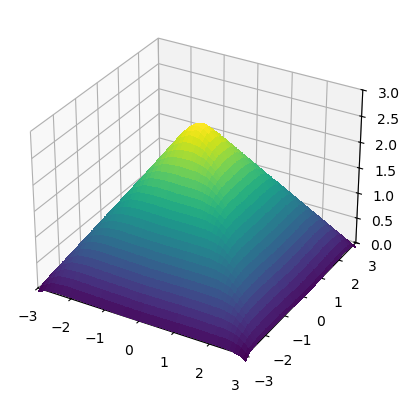

100%|██████████| 1000/1000 [00:01<00:00, 582.51it/s]


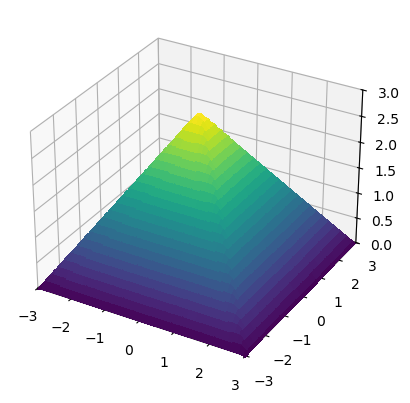

100%|██████████| 1000/1000 [00:01<00:00, 616.49it/s]


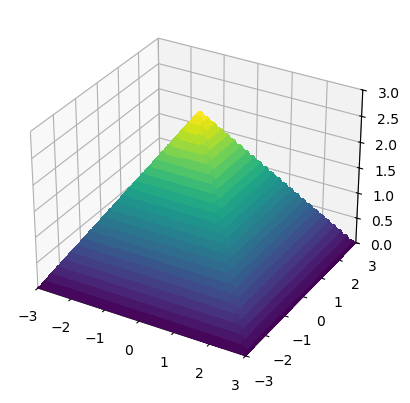

Mean square error: tensor(1.7752e-05)
L-infinity error: tensor(0.0107)
Run time: tensor(70.1802)


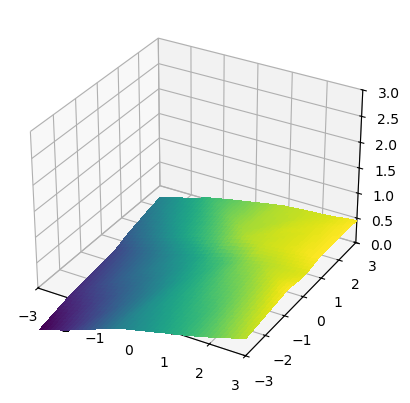

100%|██████████| 1000/1000 [00:01<00:00, 619.68it/s]


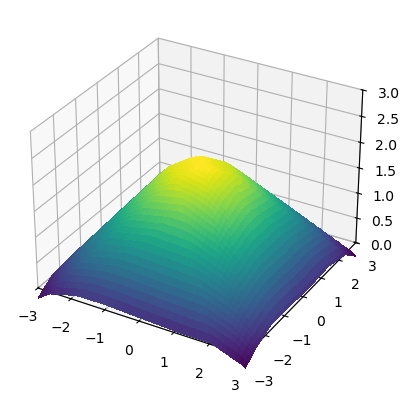

100%|██████████| 1000/1000 [00:01<00:00, 599.36it/s]


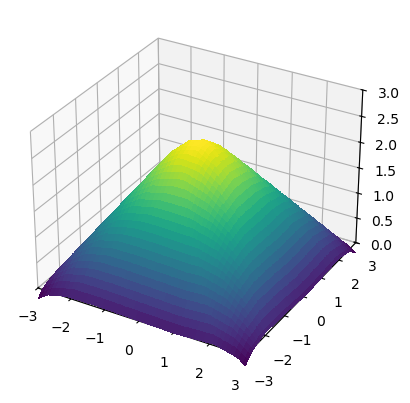

100%|██████████| 1000/1000 [00:01<00:00, 570.48it/s]


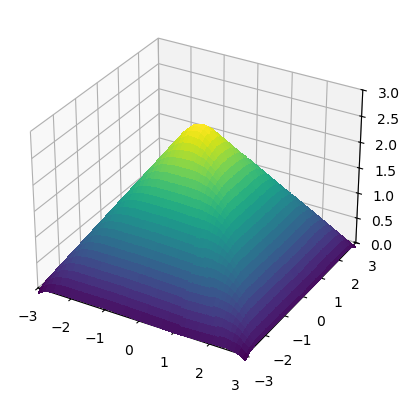

100%|██████████| 1000/1000 [00:01<00:00, 595.33it/s]


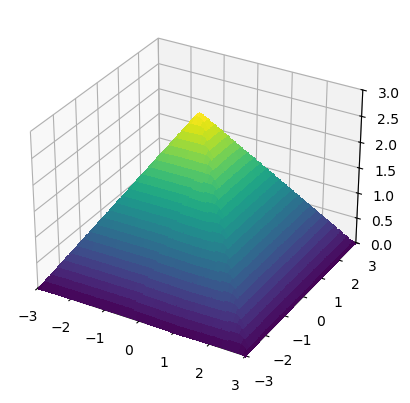

100%|██████████| 1000/1000 [00:01<00:00, 604.87it/s]


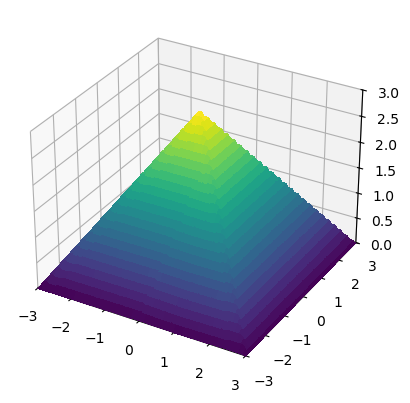

Mean square error: tensor(1.0622e-05)
L-infinity error: tensor(0.0109)
Run time: tensor(78.5526)


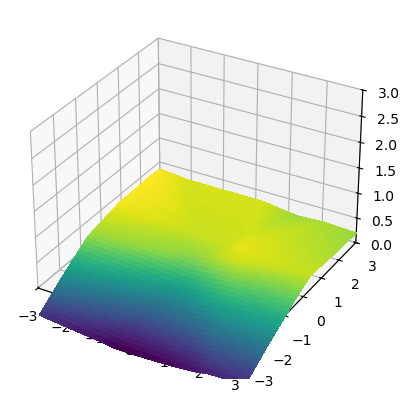

100%|██████████| 1000/1000 [00:01<00:00, 543.17it/s]


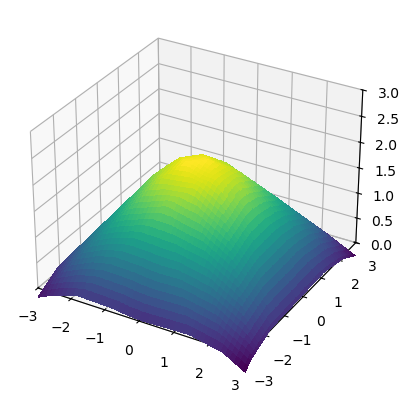

100%|██████████| 1000/1000 [00:01<00:00, 552.04it/s]


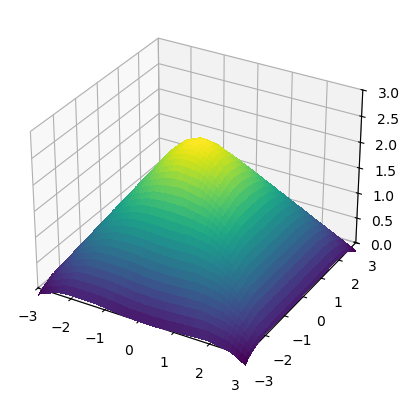

100%|██████████| 1000/1000 [00:01<00:00, 595.27it/s]


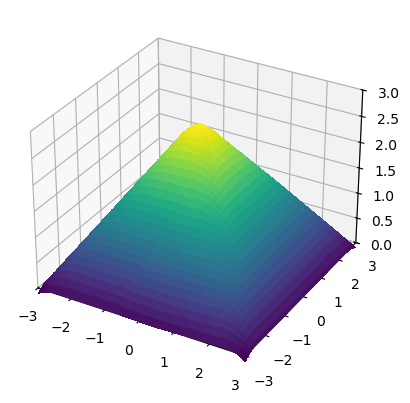

100%|██████████| 1000/1000 [00:01<00:00, 525.65it/s]


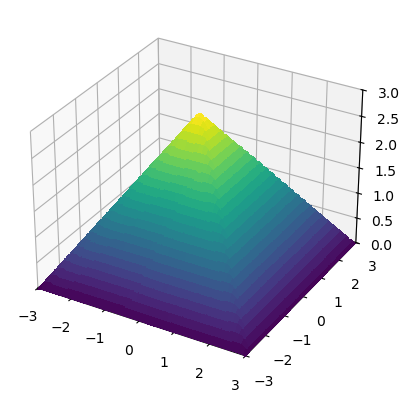

100%|██████████| 1000/1000 [00:01<00:00, 554.26it/s]


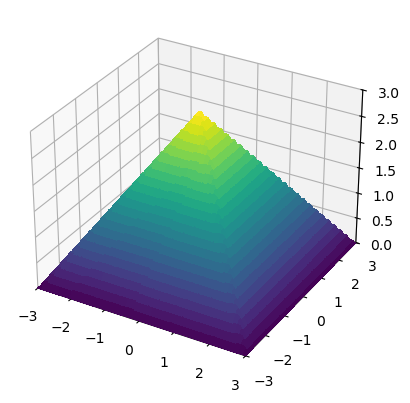

Mean square error: tensor(8.0441e-06)
L-infinity error: tensor(0.0095)
Run time: tensor(87.6094)


In [3]:
from NeuralNetworks.NNs import FCFF_2L

n_experiments = 10

MSE_history = torch.zeros([n_experiments, rounds])
L_inf_error_history = torch.zeros([n_experiments, rounds])
run_time_history = torch.zeros([n_experiments, rounds])

for j in range(n_experiments):

    # We define the NN
    NN = FCFF_2L([dim,20])
    training_params['optimizer'] = optim.SGD(NN.parameters(), lr = .02, momentum = .2)

    X_axis = 0
    Y_axis = 1
    n_grid = 100
    plot_2d_proj(X_axis, Y_axis, NN, n_grid, side_length)

    for i in range(rounds):
        
        training_params['alpha'] = alpha_list[i]
        training_params['delta'] = delta_list[i]
        training_params['n_coloc_points'] = N_col_list[i]
        training_params['n_boundary_points'] = N_b_list[i]
        training_params['num_iterations'] = num_iterations_list[i]
        
        t0 = t()
        total_loss, PDE_loss, boundary_loss = train(NN, domain, training_params)
        t1 = t() - t0 
        
        
        MC_points = int(1e5) # Number of grid points for comparison with the ground truth
        MSE, L_inf = error_cube(NN, side_length, MC_points)
        
        MSE_history[j, i] = MSE
        L_inf_error_history[j, i] = L_inf
        run_time_history[j, i] = t1
        
        X_axis = 0
        Y_axis = 1
    
        n_grid = 100
        plot_2d_proj(X_axis, Y_axis, NN, n_grid, side_length)
    
    print('Mean square error:', MSE)
    print('L-infinity error:', L_inf)
    print('Run time:', run_time_history.sum())

<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\l'
C:\Users\usuario\AppData\Local\Temp\ipykernel_32516\3493352029.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
C:\Users\usuario\AppData\Local\Temp\ipykernel_32516\3493352029.py:34: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')


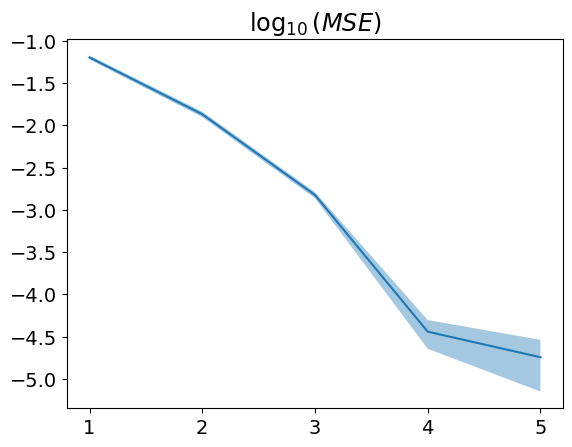

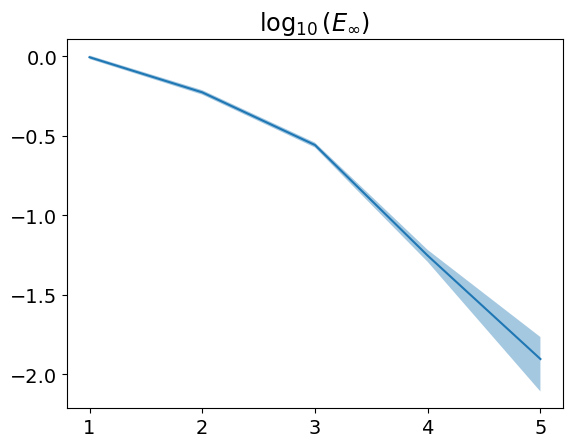

In [4]:
import numpy as np

from mpl_toolkits.axes_grid1 import host_subplot


x = np.arange(rounds) + 1
MSE = MSE_history.mean(dim = 0)
MSE_std = MSE_history.std(dim = 0)

ax = host_subplot(111)
ax.plot(x, MSE.log10())
ax.fill_between(x,
                (MSE - MSE_std).log10(),
                (MSE + MSE_std).log10(),
                alpha = .4)
ax.set_xticks(x)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
plt.show()


L_inf = L_inf_error_history.mean(dim = 0)
L_inf_std = L_inf_error_history.std(dim = 0)
ax = host_subplot(111)
ax.plot(x, L_inf.log10())
ax.fill_between(x,
               (L_inf - L_inf_std).log10(),
               (L_inf + L_inf_std).log10(),
               alpha = .4)
ax.set_xticks(x)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')
plt.show()

In [5]:
print(run_time_history.sum(-1).mean())

tensor(8.7609)
